# Exploratory data analysis of todostuslibros.com book data

This notebooks reads scraped book data from the site www.todostuslibros.com and performs an exploratory data analysis of the available variables. 

## Imports

In [156]:
import pandas as pd
from datetime import datetime
import re

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

## Read the data

In [142]:
data_path = '../data/todostuslibros_ficcion_moderna_20210623.json'

In [143]:
df = pd.read_json(data_path, orient='records')
df.head(10)

,title,author,publisher,isbn,price,binding,publishing_country,publishing_language,original_language,ean,publication_date,num_pages,img_url,tags,bookstores_number
0,Estrellas negras,"Kapuscinski, Ryszard",Editorial Anagrama,9788433936929,NaN,Libro electrónico,España,Español,Polish,9788433936929,17-02-2016,224.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],0
1,Locos de cine y otros relatos,"Pérez Rubio, Pablo",Editorial la Fragua del Trovador,9788415044758,NaN,Tapa blanda o Bolsillo,España,Español,Español,9788415044758,25-03-2017,176.0,None,[Ficción moderna y contemporanea],0
2,Pasiones romanas,"Janer, Maria de la Pau",Editorial Planeta,9788408063117,21.00,Cartoné,España,Español,Español,9788408063117,08-11-2005,452.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],9
3,Los 7 soles de la felicidad,"Sanz Cañas, Esther",Umbriel,9788489367920,5.95,Tapa blanda o Bolsillo,España,Español,,9788489367920,07-02-2011,288.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],1
4,Pack don Quijote + invitación al Quijote,AA. VV.,Lunwerg Editores,9788497851756,9.95,Cartoné,España,Español,,9788497851756,29-05-2007,1544.0,https://static.cegal.es/imagenes/marcadas/9788...,"[Ficción moderna y contemporanea, Ficción clás...",0
5,Confesión general,"Conget, José María",Editorial Pre-Textos,9788416906390,20.00,Tapa blanda o Bolsillo,España,Español,Español,9788416906390,26-04-2017,204.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],236
6,Oeste,"Davies, Carys",Ediciones Destino,9788423353934,17.50,Tapa blanda o Bolsillo,España,Español,Inglés,9788423353934,05-06-2018,192.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],218
7,Como viboras,Cecilia Aterhortúa,ALTERA,9788416645367,NaN,Tapa blanda o Bolsillo,España,Español,Español,9788416645367,06-03-2016,378.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],7
8,Escritos de un viejo indecente,"Bukowski, Charles",Editorial Anagrama,9788433938480,NaN,Libro electrónico,España,Español,Inglés,9788433938480,18-04-2006,216.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],0
9,Entre ellos,"Ford, Richard",Editorial Anagrama,9788433939074,NaN,Libro electrónico,España,Español,Inglés,9788433939074,17-01-2018,168.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79986 entries, 0 to 79985
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                79986 non-null  object 
 1   author               79147 non-null  object 
 2   publisher            79986 non-null  object 
 3   isbn                 79986 non-null  int64  
 4   price                40427 non-null  float64
 5   binding              74949 non-null  object 
 6   publishing_country   79986 non-null  object 
 7   publishing_language  79986 non-null  object 
 8   original_language    79986 non-null  object 
 9   ean                  79986 non-null  int64  
 10  publication_date     79986 non-null  object 
 11  num_pages            68665 non-null  float64
 12  img_url              59203 non-null  object 
 13  tags                 79986 non-null  object 
 14  bookstores_number    79986 non-null  int64  
dtypes: float64(2), int64(3), object(10)


### Format data types
Most of the columns from the dataset are related to descriptive qualities (thus, qualitative features), such as the type of binding, the publishing country or the language. Numerical features include the `price` and the `bookstores_number`.

- The `isbn` column is a unique identifier and it could be an appropriate index for the dataframe, once we have checked there are no duplicates. We will convert it to string, as it is not additive, nor it represents a numeric variable.
- The `ean` column relates to the [European Article Number](https://en.wikipedia.org/wiki/International_Article_Number) system. In 2007, a 13 digit ISBN number system was deployed, in order to match the EAN system. Thus, we would expect the ISBN column to have the same values as the EAN.
- The `tags` column includes all tags associated with the book in the website as a list.
- The `publication_date` is a date string with the format dd/MM/YYYY. When converting the string to timestamp, an exception is thrown for empty string values, so it's necessary to include a condition to transform empty strings to NaN.

In [145]:
df.loc[:, 'isbn'] = df.isbn.astype('string')
df.loc[:, 'ean'] = df.ean.astype('string')
df.loc[:, 'publication_date'] = df.publication_date.apply(lambda x: datetime.strptime(x, '%d-%m-%Y') if x else None)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79986 entries, 0 to 79985
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                79986 non-null  object        
 1   author               79147 non-null  object        
 2   publisher            79986 non-null  object        
 3   isbn                 79986 non-null  string        
 4   price                40427 non-null  float64       
 5   binding              74949 non-null  object        
 6   publishing_country   79986 non-null  object        
 7   publishing_language  79986 non-null  object        
 8   original_language    79986 non-null  object        
 9   ean                  79986 non-null  string        
 10  publication_date     79058 non-null  datetime64[ns]
 11  num_pages            68665 non-null  float64       
 12  img_url              59203 non-null  object        
 13  tags                 79986 non-

## Exploratory data analysis
The exploratory data analysis will start by looking at the numerical and categorical features independently, to proceed with the study of the relationships between features (correlation, etc.).

In [147]:
types_df = df.dtypes.reset_index()
types_df.rename(columns={0: "type"}, inplace=True)
types_df.head()

,index,type
0,title,object
1,author,object
2,publisher,object
3,isbn,string
4,price,float64


### Univariate analysis

#### Numerical features
The dataset has only 3 numerical features:

- `price`
- `num_pages`
- `bookstores_number`


In [148]:
quantitative_vars_df = types_df[(types_df['type']=='float64') | (types_df['type']=='int64')]
quantitative_vars = list(quantitative_vars_df['index'].to_numpy())
quantitative_vars

['price', 'num_pages', 'bookstores_number']

In [149]:
quantitative_df = df.loc[:, quantitative_vars]
quantitative_df.head()

,price,num_pages,bookstores_number
0,NaN,224.0,0
1,NaN,176.0,0
2,21.00,452.0,9
3,5.95,288.0,1
4,9.95,1544.0,0


In [150]:
quantitative_df.describe()

,price,num_pages,bookstores_number
count,40427.000000,68665.000000,79986.000000
mean,15.558106,284.810850,58.480722
std,6.497949,179.841877,92.085619
min,0.010000,1.000000,0.000000
25%,10.900000,168.000000,0.000000
50%,15.500000,256.000000,1.000000
75%,19.000000,366.000000,89.000000
max,106.620000,6121.000000,555.000000


A quick look at the distribution via the histogram or the percentiles shows that most of the books are not available in any library. It is useful to take a look at the `bookstores_number` distribution removing the 0 values, to find out that it is approximately centered around a mean of some 220 bookstores, with still a long tail of books available at just one bookshop.

The `price` distibution is centered around 15€ with a slightly long tail towards the 100€ and the `num_pages`, around 256 pages, with a short tail of very long books. 

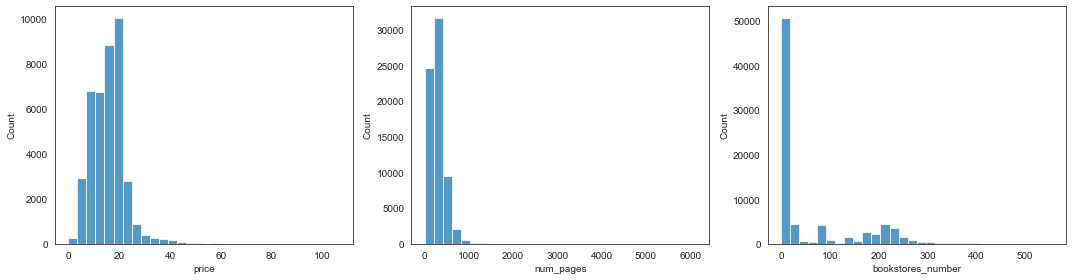

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for col, ax in zip(quantitative_vars, axes):
    sns.histplot(quantitative_df[col], bins=30, ax=ax)

plt.tight_layout() 
plt.show();

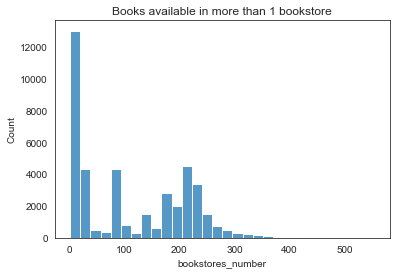

In [167]:
df_bookstores_number = df.loc[df['bookstores_number']>0, 'bookstores_number']
sns.histplot(df_bookstores_number, bins=30)
plt.title('Books available in more than 1 bookstore');

The boxplots provide a different view into the same findings: some 'outliers' with more than 1000 pages and a standard price just below 20€. The bookstores number distribution is, of course, made of values equal or above zero.

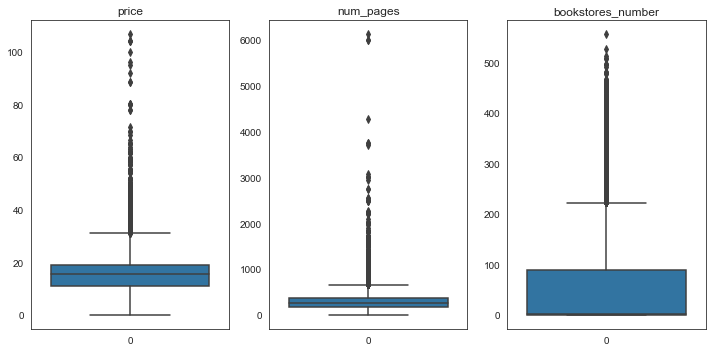

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for col, ax in zip(quantitative_vars, axes):
    sns.boxplot(data=quantitative_df[col], ax=ax)
    ax.set_title(col)
    
plt.tight_layout() 
plt.show();

#### Qualitative features
Some of the categorical features, like `title`, `author` or `publisher`, may have a great number of different values (in the case of `title`, there could be duplicates related to different editions of the same text, such as hardcover and paperback). `isbn` and `ean`, on the other hand, are supposedly unique identifiers --it is yet to be verified that there are no duplicates of these columns in the dataset.

The variables we could understand as real categorical features (belonging to a somewhat limited catalog of values) are the following:

- `binding`
- `publishing_country`
- `publishing_language`
- `original_language`
- `tags`, considered individually


In [181]:
qualitative_vars_df = types_df[(types_df['type']=='object') | (types_df['type']=='string')]
qualitative_vars = list(qualitative_vars_df['index'].to_numpy())
qualitative_vars

['title',
 'author',
 'publisher',
 'isbn',
 'binding',
 'publishing_country',
 'publishing_language',
 'original_language',
 'ean',
 'img_url',
 'tags']

In [182]:
qualitative_df = df[qualitative_vars]
qualitative_df.head()

,title,author,publisher,isbn,binding,publishing_country,publishing_language,original_language,ean,img_url,tags
0,Estrellas negras,"Kapuscinski, Ryszard",Editorial Anagrama,9788433936929,Libro electrónico,España,Español,Polish,9788433936929,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea]
1,Locos de cine y otros relatos,"Pérez Rubio, Pablo",Editorial la Fragua del Trovador,9788415044758,Tapa blanda o Bolsillo,España,Español,Español,9788415044758,None,[Ficción moderna y contemporanea]
2,Pasiones romanas,"Janer, Maria de la Pau",Editorial Planeta,9788408063117,Cartoné,España,Español,Español,9788408063117,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea]
3,Los 7 soles de la felicidad,"Sanz Cañas, Esther",Umbriel,9788489367920,Tapa blanda o Bolsillo,España,Español,,9788489367920,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea]
4,Pack don Quijote + invitación al Quijote,AA. VV.,Lunwerg Editores,9788497851756,Cartoné,España,Español,,9788497851756,https://static.cegal.es/imagenes/marcadas/9788...,"[Ficción moderna y contemporanea, Ficción clás..."


Let's study the distribution of the categorical variables:

In [190]:
categorical_vars = ['binding', 'publishing_country', 'publishing_language', 'original_language']
categorical_df = df.loc[:, categorical_vars]
categorical_df.head()

,binding,publishing_country,publishing_language,original_language
0,Libro electrónico,España,Español,Polish
1,Tapa blanda o Bolsillo,España,Español,Español
2,Cartoné,España,Español,Español
3,Tapa blanda o Bolsillo,España,Español,
4,Cartoné,España,Español,


It is noticeable that there are no NaN values as such for these features, but all of them have occurrences with the empty string, which could be considered the None value for these features.

In the case of `publishing_language` and `original_language` it is also important to notice that the top two values are 'Español' and 'Castellano', that are in fact the same language. The value 'No determinado' (unspecified) for language could also be considered a NaN.

In [194]:
for catvar in categorical_vars:
    print('******** Value counts for feature:', catvar)
    print(categorical_df[catvar].value_counts())

******** Value counts for feature: binding
Tapa blanda o Bolsillo          46700
Libro electrónico               16995
Cartoné                          5690
Libro                            2557
                                 1902
Libro en otro formato             507
Archivo de audio descargable      378
Recurso en línea                  160
Piel / Lujo                        24
CD-Audio                            8
Espiral                             7
Mapa en hojas                       4
Folleto                             4
Tarjetas                            2
DVD Audio                           2
Disco audio                         2
Producto multisoporte               2
Calendario                          1
Libro de tela                       1
Película o transparencia            1
Material impreso variado            1
Carpeta                             1
Name: binding, dtype: int64
******** Value counts for feature: publishing_country
España                         75274
  

### Multivariate analysis

<Figure size 936x1152 with 0 Axes>

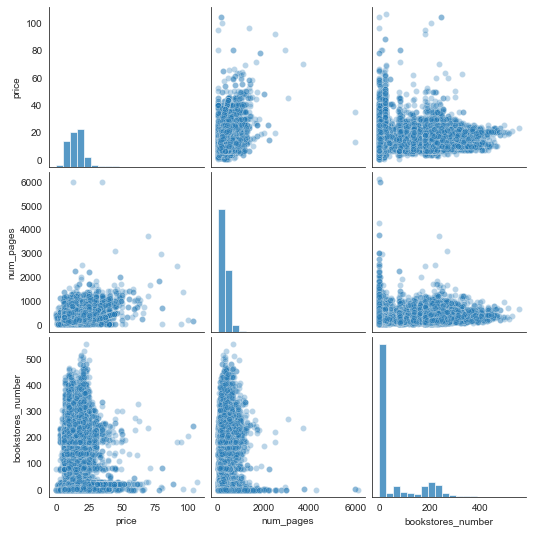

In [158]:
plt.figure(figsize=(13,16))
sns.pairplot(quantitative_df, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.3}, diag_kws={'bins':20});

### Null values
- A few columns have NaN values in case the information is not available in the web site. That applies to `price`. 
- Other columns list an empty string (`original_language`, `publication_date`) or a 'None' (`img_url`) in case the information is not available.
- The variable `bookstores_number` has the value 0 when the book is not available in any of the bookshops associated with the web site.